In [9]:
from ml.nn import *
from datasets.dataset import load_mnist
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import *

In [10]:
(x_train, t_train), (x_test, t_test) = load_mnist(one_hot=False)

#### 隠れ層の総数

In [11]:
input_size = 784
output_size = 10
middle_layer_size = 50
lr = 0.001
optimizer = 'Adam'

In [12]:
model = Sequential()
model.addlayer(Linear(input_size, middle_layer_size, optimizer=optimizer, lr=lr))
model.addlayer(ReLU(optimizer=optimizer, lr=lr))
model.addlayer(Linear(middle_layer_size, middle_layer_size, optimizer=optimizer, lr=lr))
model.addlayer(ReLU(optimizer=optimizer, lr=lr))
model.addlayer(Linear(middle_layer_size, middle_layer_size, optimizer=optimizer, lr=lr))
model.addlayer(ReLU(optimizer=optimizer, lr=lr))
model.addlayer(Linear(middle_layer_size, output_size, optimizer=optimizer, lr=lr))
network = Classifier(model)

In [13]:
batch_size = 100
epoch = 30
n_train = x_train.shape[0]
n_test = x_test.shape[0]

In [14]:
epoch_list = []
train_loss_list = []
train_acc_list = []
test_loss_list = []
test_acc_list = []

In [15]:
for e in range(epoch):
#     print('epoch %d'%(e+1)
    acctrain = 0
    losstrain = 0
    randinds = np.random.permutation(n_train)
    for it in range(0, n_train, batch_size):
        ind = randinds[it:it+batch_size]
        x = x_train[ind]
        t = t_train[ind]
        loss, acc = network.update(x, t)
        acctrain += int(acc * batch_size) 
        losstrain += loss
    acctrain /= (1.0 * n_train)
    losstrain /= (n_train // batch_size)
    
#     print('train, loss %f, acc %f'%(train_loss, train_acc))

    acctest = 0
    losstest = 0
    for it in range(0, n_test, batch_size):
        x = x_test[it:it+batch_size]
        t = t_test[it:it+batch_size]
        loss, acc = network.predict(x, t)
        acctest += int(acc * batch_size)
        losstest += loss
    acctest /= (1.0 * n_test)
    losstest /= (n_test // batch_size)
    print('test, loss %f, acc %f'%(losstest, acctest))
    
    epoch_list.append(e+1)
    train_loss_list.append(losstrain)
    train_acc_list.append(acctrain)
    test_loss_list.append(losstest)
    test_acc_list.append(acctest)

test, loss 0.213216, acc 0.938700
test, loss 0.169159, acc 0.951300
test, loss 0.151898, acc 0.953700
test, loss 0.133831, acc 0.960100
test, loss 0.121603, acc 0.963000
test, loss 0.116454, acc 0.964200
test, loss 0.115834, acc 0.964500
test, loss 0.106172, acc 0.967300
test, loss 0.099538, acc 0.968500
test, loss 0.098244, acc 0.968300
test, loss 0.103665, acc 0.968900
test, loss 0.092763, acc 0.970600
test, loss 0.090601, acc 0.971600
test, loss 0.088975, acc 0.972200
test, loss 0.088738, acc 0.973400
test, loss 0.089621, acc 0.971300
test, loss 0.100434, acc 0.968700
test, loss 0.089421, acc 0.972700
test, loss 0.090586, acc 0.971700
test, loss 0.090356, acc 0.972500
test, loss 0.085977, acc 0.973400
test, loss 0.086932, acc 0.974600
test, loss 0.089816, acc 0.973200
test, loss 0.090744, acc 0.973000
test, loss 0.086283, acc 0.974600
test, loss 0.093386, acc 0.971700
test, loss 0.091367, acc 0.973400
test, loss 0.095033, acc 0.973800
test, loss 0.091322, acc 0.973900
test, loss 0.0

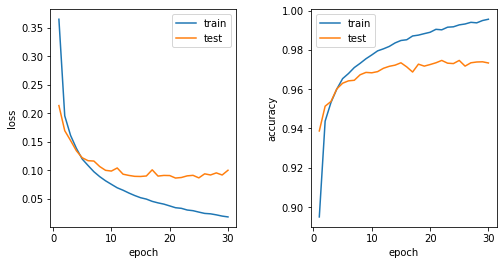

In [16]:
fig = plt.figure(figsize=(8, 4))
loss_graph = fig.add_subplot(1, 2, 1)
acc_graph = fig.add_subplot(1, 2, 2)
loss_graph.set_xlabel('epoch')
loss_graph.set_ylabel('loss')
acc_graph.set_xlabel('epoch')
acc_graph.set_ylabel('accuracy')

loss_graph.plot(epoch_list, train_loss_list, label='train')
loss_graph.plot(epoch_list, test_loss_list, label='test')
loss_graph.legend()

acc_graph.plot(epoch_list, train_acc_list, label='train')
acc_graph.plot(epoch_list, test_acc_list, label='test')
acc_graph.legend()

plt.subplots_adjust(wspace=0.4, hspace=0.6)
plt.savefig('nn_add_layer.png')

#### 最適化手法による差異

In [38]:
input_size = 784
output_size = 10
middle_layer_size = 50
lr = 0.001

In [39]:
networks = []
optimizers = ['Momentum SGD', 'AdaGrad', 'Adam']

In [40]:
for i in range(3):
    optimizer = optimizers[i]
    model = Sequential()
    model.addlayer(Linear(input_size, middle_layer_size, optimizer=optimizer, lr=lr))
    model.addlayer(ReLU(optimizer=optimizer, lr=lr))
    model.addlayer(Linear(middle_layer_size, middle_layer_size, optimizer=optimizer, lr=lr))
    model.addlayer(ReLU(optimizer=optimizer, lr=lr))
    model.addlayer(Linear(middle_layer_size, output_size, optimizer=optimizer, lr=lr))
    network = Classifier(model)
    networks.append(network)

In [41]:
batch_size = 100
epoch = 30
n_train = x_train.shape[0]
n_test = x_test.shape[0]

In [42]:
train_loss_lists = []
test_loss_lists = []

In [43]:
for i in range(3):
    train_loss_list = []
    test_loss_list = []
    for e in range(epoch):
        acctrain = 0
        losstrain = 0
        randinds = np.random.permutation(n_train)
        for it in range(0, n_train, batch_size):
            ind = randinds[it:it+batch_size]
            x = x_train[ind]
            t = t_train[ind]
            loss, acc = networks[i].update(x, t)
            acctrain += int(acc * batch_size) 
            losstrain += loss
        acctrain /= (1.0 * n_train)
        losstrain /= (n_train // batch_size)
        train_loss_list.append(losstrain)

        acctest = 0
        losstest = 0
        for it in range(0, n_test, batch_size):
            x = x_test[it:it+batch_size]
            t = t_test[it:it+batch_size]
            loss, acc = networks[i].predict(x, t)
            acctest += int(acc * batch_size)
            losstest += loss
        acctest /= (1.0 * n_test)
        losstest /= (n_test // batch_size)
        test_loss_list.append(losstest)
    train_loss_lists.append(train_loss_list)
    test_loss_lists.append(test_loss_list)

In [44]:
epoch_list = [i+1 for i in range(30)]

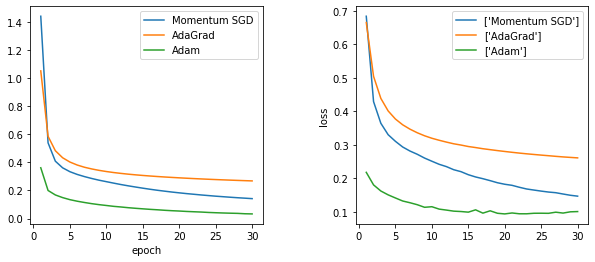

In [45]:
fig = plt.figure(figsize=(10, 4))

trainloss_graph = fig.add_subplot(1, 2, 1)
testloss_graph = fig.add_subplot(1, 2, 2)
trainloss_graph.set_xlabel('epoch')
testloss_graph.set_ylabel('loss')
trainloss_graph.set_xlabel('epoch')
testloss_graph.set_ylabel('loss')

for i in range(3):
    
    trainloss_graph.plot(epoch_list, train_loss_lists[i], label=optimizers[i])
    trainloss_graph.legend()

    testloss_graph.plot(epoch_list, test_loss_lists[i], label=[optimizers[i]])
    testloss_graph.legend()

plt.subplots_adjust(wspace=0.4, hspace=0.6)
plt.savefig('nn_optimizer.png')